In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv("petrol_consumption.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
print(data.shape)
type(data)

(48, 5)


pandas.core.frame.DataFrame

In [8]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


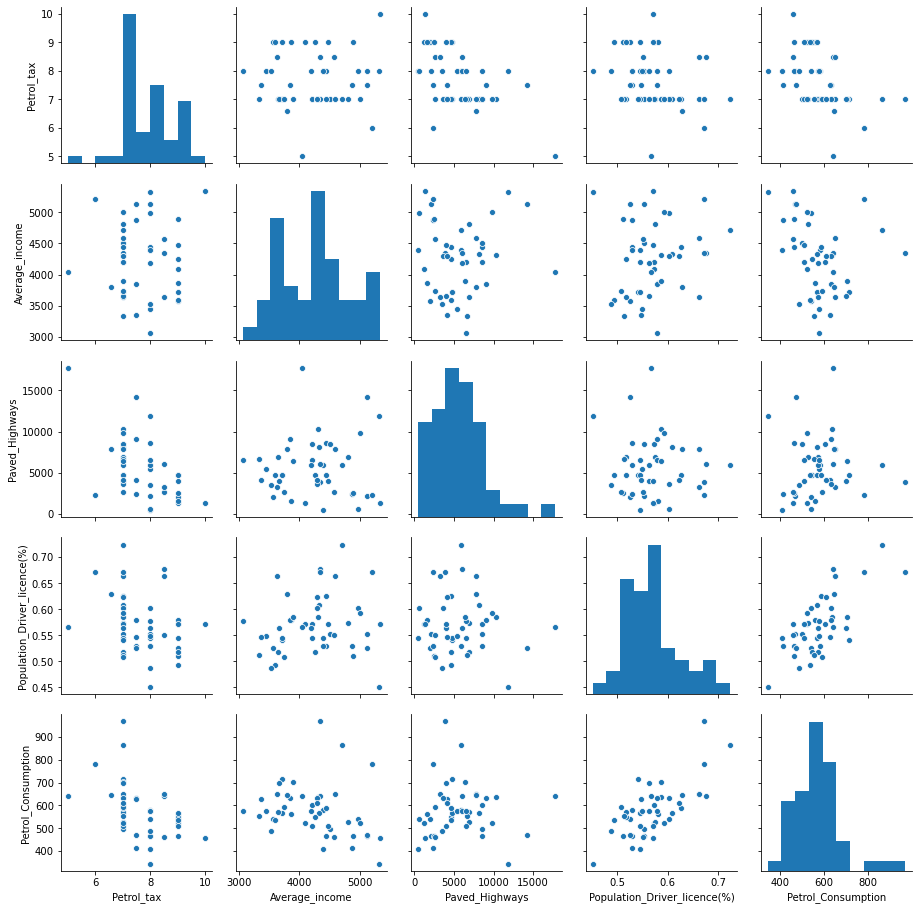

In [11]:
sb.pairplot(data)
plt.show()

In [13]:
inputs = data [['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
inputs.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [15]:
outputs = data [['Petrol_Consumption']]
outputs.head()

,Petrol_Consumption
0,541
1,524
2,561
3,414
4,410


In [28]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
#chia du lieu
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)


In [18]:
#huan luyen du lieu
reg1  = LinearRegression()
reg1 = reg1.fit(X_train, y_train)

In [19]:
#kiem tra du lieu
y_predict = reg1.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_predict)[0].values})
df.head()

,Actual,Prediction
0,968,692.627709
1,344,332.319319
2,699,609.495583
3,464,406.418429
4,648,705.276994


In [23]:
m = reg1.coef_[0]
b = reg1.intercept_
print("Coefficients: ", m)
print("Variance score: ", b)

Coefficients:  [-1.99882721e+01 -7.71932996e-02  1.44275678e-03  1.25168559e+03]
Variance score:  [321.18381564]


In [25]:
#the mean square error
print("The mean square error : %.2f" % mean_squared_error(outputs, reg1.predict(inputs)))
print("The variance score: %.2f" % reg1.score(inputs, outputs))

The mean square error : 4425.81
The variance score: 0.64


Mô hình chỉ khái quát được 64% dữ liệu, MSE lớn-> thuật toán này không chính xác lắm. Một số yếu tố có thể đã góp phần vào sự không chính xác này là:
. Cần thêm dữ liệu
. Giả định xấu
. Tính năng kém

In [30]:
metrics.r2_score(y_test, y_predict)

0.5473478584819501

In [31]:
reg1.score(X_train, y_train)

0.6846711174995477

In [32]:
reg1.score(X_test, y_test)

0.5473478584819501

In [31]:
#diem cua du lieu train va test deu co diem cao, khong chenh lech qua nhieu

In [33]:
y_train_predict  = reg1.predict(X_train)
y_test_predict  = reg1.predict(X_test)

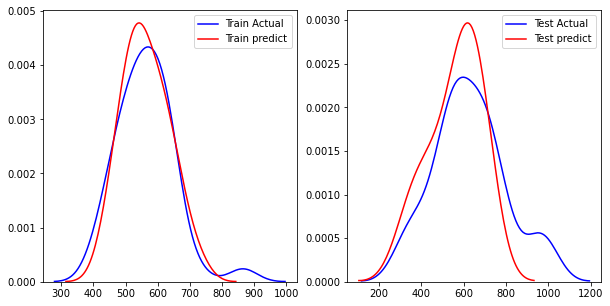

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = sb.distplot(y_train, hist= False, color='b', label = 'Train Actual')
sb.distplot(y_train_predict, hist = False, color='r', label = 'Train predict')
plt.subplot(1,2,2)
ax2 = sb.distplot(y_test, hist= False, color='b', label = 'Test Actual')
sb.distplot(y_test_predict, hist = False, color='r', label = 'Test predict')
plt.legend()
plt.show()